# Exercise 2:

Random Forest Analysis for Predicting Heart Disease (Heart Disease)


# Part 0

Import necessary libraries


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Section 2:

Data Loading and Splitting


In [16]:
# Load the dataset
url = r"E:\Maktab\Artificial Intelligence\Programming\HomeWork\HW08\p2\heart_cleveland_upload.csv"
data = pd.read_csv(url)

# Separate features (X) and target (y)
X = data.drop('condition', axis=1)
y = data['condition']

# Split data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Report the number of samples
print("Number of training samples:", X_train.shape[0])
print("Number of test samples:", X_test.shape[0])
print("Total samples:", data.shape[0])

Number of training samples: 207
Number of test samples: 90
Total samples: 297


# Section 3:

Building and Training Random Forest Model


Train Accuracy: 0.918 (91.8%)
Test Accuracy: 0.767 (76.7%)
Accuracy Difference: 0.151 (15.1%)
  thal: 0.169
  thalach: 0.153
  oldpeak: 0.127
  ca: 0.117
  cp: 0.093


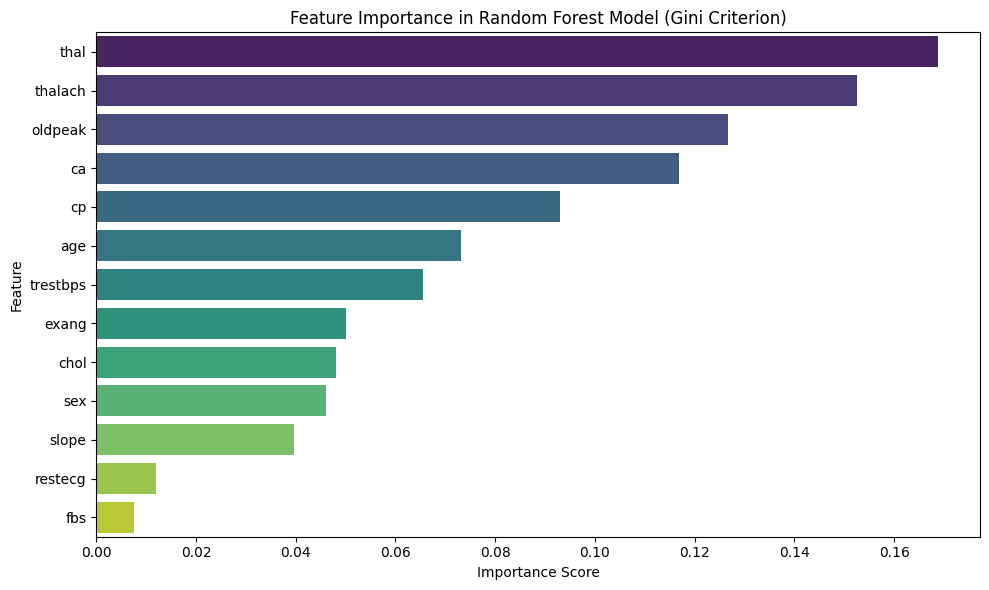

In [17]:
# 3-1. Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', 
                                  max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)

# 3-2. Calculate accuracy on train and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
print(f"Test Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
print(f"Accuracy Difference: {abs(train_accuracy-test_accuracy):.3f} ({(train_accuracy-test_accuracy)*100:.1f}%)")

# 3-3. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 5 Most Important Features
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.3f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis',hue='Feature', legend=False)
plt.title('Feature Importance in Random Forest Model (Gini Criterion)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()
print()


# Section 4:

Advanced Evaluation


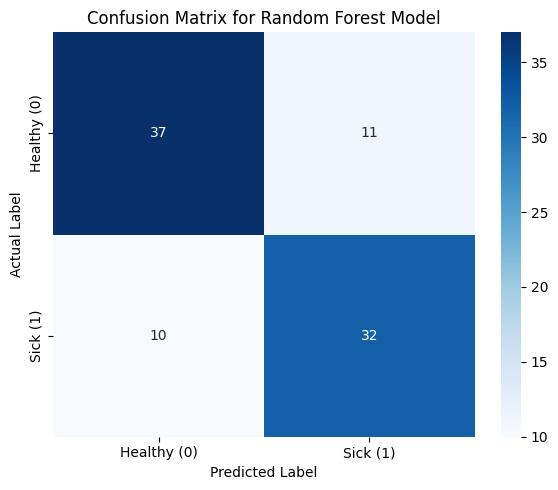


confusion matrix:-------------------------

True Positives (TP): 32
True Negatives (TN): 37
False Positives (FP): 11
False Negatives (FN): 10

Additional Performance Metrics:-----------

Precision: 0.744
Recall (Sensitivity): 0.762
F1-Score: 0.753

Classification report:--------------------

              precision    recall  f1-score   support

     Healthy       0.79      0.77      0.78        48
        Sick       0.74      0.76      0.75        42

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90



In [18]:
# 4-1. Confusion Matrix Analysis
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy (0)', 'Sick (1)'], 
            yticklabels=['Healthy (0)', 'Sick (1)'])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

print("\nconfusion matrix:-------------------------\n")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate additional metrics
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Additional Performance Metrics
print("\nAdditional Performance Metrics:-----------\n")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1-Score: {f1_score:.3f}")

# Classification report
print("\nClassification report:--------------------\n")
print(classification_report(y_test, y_test_pred, target_names=['Healthy', 'Sick']))


# Additional Analysis:

Overfitting Comparison


Overfitting Analysis
Why Random Forest has less overfitting than a single Decision Tree?

1. Ensemble Method: Combines predictions from multiple trees
2. Bagging: Each tree trained on random subset of data (bootstrap samples)
3. Feature Randomness: Random subset of features considered for each split
4. Voting Mechanism: Final prediction based on majority vote
5. Parameter Control: max_depth=4 limits tree complexity
